# Diabetes

## What is the business question?
       -predicting whether the person is having diabetes or not
## What each row represent?
     -Each row represent a female patient
##  What is the evaluation method?
    -Submissions are evaluated with recall

## 1- Importing needed libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import RobustScaler
# Model
from sklearn.linear_model import LogisticRegression
# Evaluation and Model Selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics

## 2- Load Data

In [25]:
df=pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3-Data Understanding

## 3.1What is the structure of the data?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> The main insights are: 
> - There is 768 records.
> - There is no nulls in all columns.
> - Our features are numerical

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.2 Checking zero values

In [28]:
print("total number of rows : {0}".format(len(df)))
print(" missing glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print(" missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print(" missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print(" missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print(" missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print(" missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print(" missing Age: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
 missing glucose: 5
 missing BloodPressure: 35
 missing SkinThickness: 227
 missing Insulin: 374
 missing BMI: 11
 missing DiabetesPedigreeFunction: 0
 missing Age: 0


> Nulls in this dataset are present in form of zeros


## 3.3Checking ditributions

In [29]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

> Data is imbalanced 
>- Number of diabetics is less than non-diabetics

## 3.4Checking correlation between features

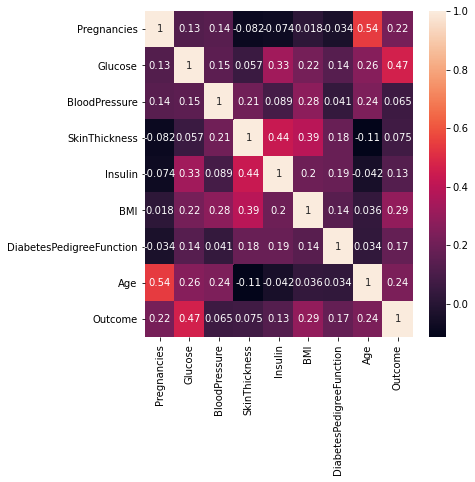

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

> Features that have positive correlation with outcome
>- Glucose,BMI,Age,pregrancies

## 3.5Checking for outliers

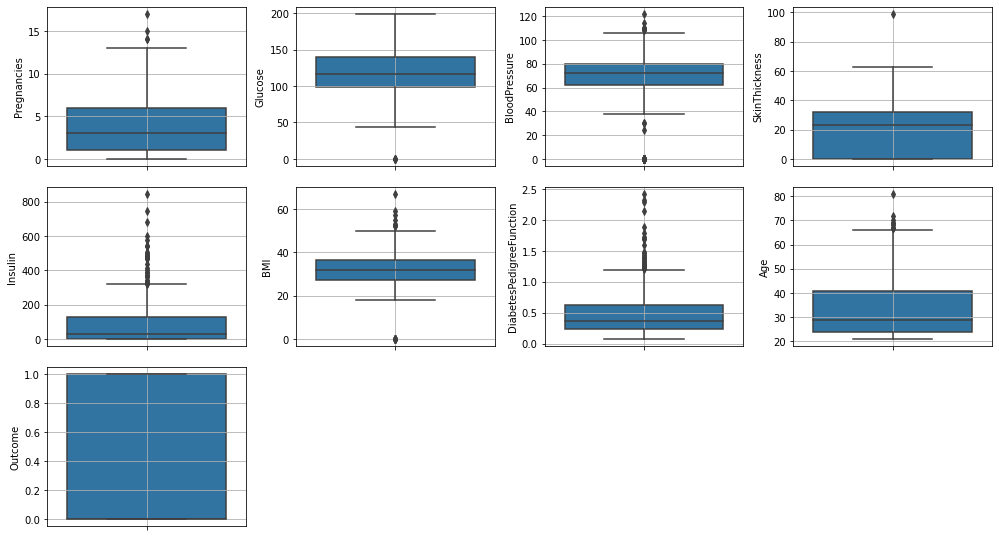

In [31]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=df)
    plt.grid()
fig.tight_layout(pad=1.0)

## 3.6 Conclusion

>- 1-Our features are numerical
>- 2-Missing values are present in the form of zero values
>- 3-Data is imbalanced
>- 4-Important features are Glucose,BMI,Age,pregrancies

## 4-Data preprcessing

>- Inplace zero values with mean
>- Handling outliers
>- Feature scaling

In [32]:
# Inplace zero values with mean
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [34]:
# feature scaling
(df.Pregnancies- df.Pregnancies.min()) / (df.Pregnancies.max() - df.Pregnancies.min())
(df.Glucose - df.Glucose.min()) / (df.Glucose.max() - df.Glucose.min())
(df.BloodPressure - df.BloodPressure.min()) / (df.BloodPressure.max() - df.BloodPressure.min())
(df.SkinThickness - df.SkinThickness.min()) / (df.SkinThickness.max() - df.SkinThickness.min())
(df.Insulin - df.Insulin.min()) / (df.Insulin.max() - df.Insulin.min())
(df.BMI - df.BMI.min()) / (df.BMI.max() - df.BMI.min())
(df.DiabetesPedigreeFunction-df.DiabetesPedigreeFunction.min())/(df.DiabetesPedigreeFunction.max()-df.DiabetesPedigreeFunction.min())
(df.Age - df.Age.min()) / (df.Age.max() - df.Age.min())

0      0.483333
1      0.166667
2      0.183333
3      0.000000
4      0.200000
         ...   
763    0.700000
764    0.100000
765    0.150000
766    0.433333
767    0.033333
Name: Age, Length: 768, dtype: float64

In [35]:
# Feature scaling
# copy the data
df_scaled = df.copy()
# apply normalization techniques by Column 1
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df_scaled[columns] = (df_scaled[columns] - df_scaled[columns].min()) / (df_scaled[columns].max() - df_scaled[columns].min())    
# view normalized data
display(df_scaled)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,1


### Outliers in this case will matter a lot , as they are important information

## 5-splitting and oversampling data

In [36]:
#Split data x, y 
#X =df_scaled.iloc[:, :-1]
X = df.drop(['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome'],axis=1)
y =df_scaled.iloc[:, -1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
# Splitting the dataset into the Training set and Test set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.40, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.20, random_state= 1)

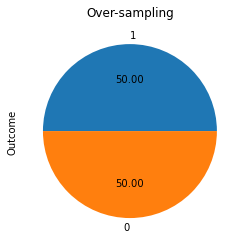

In [38]:
# oversampling minority class to get balanced data
from sklearn.neighbors import DistanceMetric
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") 
Xtrain_res, ytrain_res = ros.fit_resample(X_train, y_train)

ax = ytrain_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [39]:
print("X_train shape: {}".format(Xtrain_res.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(ytrain_res.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (494, 4)
X_test shape: (308, 4)
y_train shape: (494,)
y_test shape: (308,)
X_val shape: (92, 4)
y val shape: (92,)


## 5- Logistic regression model

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain_res,ytrain_res)


LogisticRegression()

In [41]:
predict_train = model.predict(Xtrain_res)
predict_val=model.predict(X_val)
print(accuracy_score(ytrain_res,predict_train),accuracy_score(y_val,predict_val))

0.6902834008097166 0.7717391304347826


In [42]:
#confusion matrix
predictions=model.predict(X_test)
cm=confusion_matrix(y_test,predictions)
cm

array([[155,  44],
       [ 34,  75]], dtype=int64)

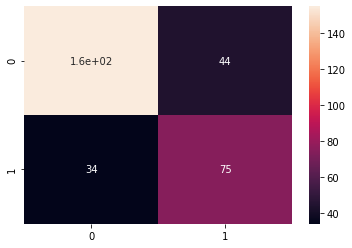

In [43]:
sns.heatmap(cm,annot=True)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       199
           1       0.63      0.69      0.66       109

    accuracy                           0.75       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.75      0.75      0.75       308

